### Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #you can use minmax scaler too
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from imblearn.ensemble import BalancedBaggingClassifier
#Import other necessary model libraries, for this example, using Logistic Regression

### Importing the dataset

In [2]:
train_data = pd.read_csv(r"../Data/Preprocessed-Datasets/train-data-encoded.csv", header = 0)
test_data = pd.read_csv(r"../Data/Preprocessed-Datasets/test-data-encoded.csv", header = 0)
validation_data = pd.read_csv(r"../Data/Preprocessed-Datasets/validation-data-encoded.csv", header = 0)

In [3]:
train_data=train_data.drop(['Reservation-id'], axis = 1)
validation_data=validation_data.drop(['Reservation-id'], axis = 1)
test_data=test_data.drop(['Reservation-id'], axis = 1)

In [4]:
validation_data.head()

,Age,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap,Gender_F,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,56,2,2,0,No-Show,15,192,2,195,0,...,1,0,0,1,0,0,1,0,0,1
1,60,2,2,0,Canceled,0,187,4,175,0,...,1,0,0,0,0,1,0,1,1,0
2,58,3,1,0,Canceled,10,227,1,193,1,...,1,0,0,0,1,0,1,0,0,1
3,23,1,2,0,Check-In,25,189,2,103,1,...,0,0,1,0,1,0,1,0,0,1
4,47,1,1,0,Check-In,10,218,1,92,1,...,1,0,0,0,0,1,0,1,0,1


In [5]:
validation_data.head()

,Age,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap,Gender_F,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,56,2,2,0,No-Show,15,192,2,195,0,...,1,0,0,1,0,0,1,0,0,1
1,60,2,2,0,Canceled,0,187,4,175,0,...,1,0,0,0,0,1,0,1,1,0
2,58,3,1,0,Canceled,10,227,1,193,1,...,1,0,0,0,1,0,1,0,0,1
3,23,1,2,0,Check-In,25,189,2,103,1,...,0,0,1,0,1,0,1,0,0,1
4,47,1,1,0,Check-In,10,218,1,92,1,...,1,0,0,0,0,1,0,1,0,1


### Seperating the columns of categorical and quantitative data

In [6]:
data_quan_cols = ['Age','Discount_Rate', 'Room_Rate','Expected_stay_days', 
                        'Reservation_gap', 'Adults', 'Children','Babies']

In [7]:
data_cat_cols = ['Gender', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region',
                 'Hotel_Type', 'Meal_Type', 'Visted_Previously',
                 'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
                 'Required_Car_Parking', 'Use_Promotion']

### Scaling the quantitative variables

In [8]:
train_data_quan = train_data[data_quan_cols]
validation_data_quan = validation_data[data_quan_cols]
test_data_quan = test_data[data_quan_cols]

In [9]:
sc = StandardScaler()

In [10]:
train_data_quan_scaled = sc.fit_transform(train_data_quan)
validation_data_quan_scaled = sc.transform(validation_data_quan)
test_data_quan_scaled = sc.transform(test_data_quan)

In [11]:
train_data_quan_scaled

array([[-0.25991554, -0.22266812,  0.97691768, ..., -0.28353117,
         0.35475481, -0.61317041],
       [ 0.32820944, -1.11506055,  0.22480302, ...,  0.56644415,
         1.73987514, -0.61317041],
       [-0.1292211 , -1.11506055, -1.27942629, ...,  0.56644415,
         1.73987514, -0.61317041],
       ...,
       [ 0.32820944, -0.66886434,  0.61225603, ..., -0.28353117,
        -1.03036552,  1.13107011],
       [ 1.37376495,  0.66972431, -0.41335487, ...,  0.56644415,
         0.35475481, -0.61317041],
       [ 0.26286222, -1.11506055,  0.79458685, ...,  0.56644415,
        -1.03036552, -0.61317041]])

In [12]:
type(train_data_quan_scaled)

numpy.ndarray

### Separating the categorical variables

In [13]:
cols_to_drop = data_quan_cols.copy()
cols_to_drop.append("Reservation_Status")
cols_to_drop

['Age',
 'Discount_Rate',
 'Room_Rate',
 'Expected_stay_days',
 'Reservation_gap',
 'Adults',
 'Children',
 'Babies',
 'Reservation_Status']

In [14]:
print(cols_to_drop)

['Age', 'Discount_Rate', 'Room_Rate', 'Expected_stay_days', 'Reservation_gap', 'Adults', 'Children', 'Babies', 'Reservation_Status']


In [15]:
train_data_cat = train_data.drop(cols_to_drop, axis=1)
validation_data_cat = validation_data.drop(cols_to_drop, axis=1)
test_data_cat = test_data.drop(data_quan_cols, axis=1)
train_data_cat.head()

,Gender_F,Gender_M,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
3,0,1,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [16]:
data_cols_plot = ['Age','Discount_Rate', 'Room_Rate','Expected_stay_days', 'Reservation_gap', 
              'Adults', 'Children','Babies', 'Gender_F', 'Gender_M', 'Ethnicity_African American',
              'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
              'Educational_Level_College', 'Educational_Level_Grad','Educational_Level_High-School',
              'Educational_Level_Mid-School','Income_25K --50K', 'Income_50K -- 100K', 'Income_<25K',
              'Income_>100K','Country_region_East', 'Country_region_North', 'Country_region_South',
              'Country_region_West', 'Hotel_Type_Airport Hotels','Hotel_Type_City Hotel',
              'Hotel_Type_Resort', 'Meal_Type_BB','Meal_Type_FB', 'Meal_Type_HB', 'Visted_Previously_No',
              'Visted_Previously_Yes', 'Previous_Cancellations_No','Previous_Cancellations_Yes',
              'Deposit_type_No Deposit','Deposit_type_Non-Refundable', 'Deposit_type_Refundable',
              'Booking_channel_Agent', 'Booking_channel_Direct','Booking_channel_Online',
              'Required_Car_Parking_No','Required_Car_Parking_Yes', 'Use_Promotion_No', 'Use_Promotion_Yes']

In [17]:
train_data_cat_array = train_data_cat.to_numpy()
validation_data_cat_array = validation_data_cat.to_numpy()
test_data_cat_array = test_data_cat.to_numpy()
train_data_cat_array.shape

(27499, 38)

### Joining the pre-processed data

In [18]:
train_data_processed = np.concatenate((train_data_quan_scaled, train_data_cat_array), axis = 1)
validation_data_processed = np.concatenate((validation_data_quan_scaled, validation_data_cat_array), axis = 1)
test_data_processed = np.concatenate((test_data_quan_scaled, test_data_cat_array), axis = 1)

In [19]:
train_data_processed[0]

array([-0.25991554, -0.22266812,  0.97691768, -0.84878606, -0.88293639,
       -0.28353117,  0.35475481, -0.61317041,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ])

In [20]:
test_data_quan_scaled.shape

(4318, 8)

In [21]:
test_data_cat_array.shape

(4318, 38)

In [22]:
validation_data_processed.shape

(2749, 46)

### Encoding the labels

In [23]:
train_y = train_data['Reservation_Status']
validation_y = validation_data['Reservation_Status']

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
train_y = le.fit_transform(train_y)
validation_y = le.transform(validation_y)

In [26]:
validation_y.shape

(2749,)

In [27]:
le.classes_

array(['Canceled', 'Check-In', 'No-Show'], dtype=object)

### Coding...

In [28]:
from imblearn.over_sampling import SMOTE
#0: Cancelled, 1: Check--in , 2:No Show

In [29]:
#Oversampling
strategy = {0:4134*5, 1:21240, 2:2125*9}
smote = SMOTE(sampling_strategy=strategy) 

X_smote, y_smote = smote.fit_resample(train_data_processed, train_y)
#print(Counter(y_train), Counter(y_smote))

In [30]:
#NearMiss
from imblearn.under_sampling import TomekLinks #use TomekLinks and NearMiss

strategy = {1: round(21240*0.5), 0: 4134*2, 2: 2125*4}
undersample = TomekLinks()

X_near , y_near = undersample.fit_resample(X_smote,y_smote)

In [31]:
unique_near = np.bincount(y_near)
print(unique_near)

[20661 21230 19125]


- Use X_near, y_near as points to plot data
- Use data_cols_plot for col_names

In [36]:
correlation_df = pd.DataFrame(X_near,columns=data_cols_plot)
correlation_df

,Age,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap,Adults,Children,Babies,Gender_F,Gender_M,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,-0.259916,-0.222668,0.976918,-0.848786,-0.882936,-0.283531,0.354755,-0.613170,1.000000,0.000000,...,1.000000,0.000000,0.00000,0.0,0.000000,1.000000,0.0,1.0,0.000000,1.000000
1,0.328209,-1.115061,0.224803,-0.848786,-0.947000,0.566444,1.739875,-0.613170,1.000000,0.000000,...,0.000000,0.000000,1.00000,0.0,0.000000,1.000000,0.0,1.0,1.000000,0.000000
2,-0.129221,-1.115061,-1.279426,2.196324,-1.369820,0.566444,1.739875,-0.613170,1.000000,0.000000,...,1.000000,0.000000,0.00000,0.0,0.000000,1.000000,0.0,1.0,1.000000,0.000000
3,-1.240124,-0.668864,-0.709642,-0.848786,-1.254505,1.416419,1.739875,-0.613170,0.000000,1.000000,...,0.000000,0.000000,1.00000,1.0,0.000000,0.000000,0.0,1.0,0.000000,1.000000
4,1.177723,-0.222668,1.523910,-0.848786,-1.241693,-1.133506,-1.030366,-0.613170,1.000000,0.000000,...,1.000000,0.000000,0.00000,0.0,1.000000,0.000000,1.0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61011,-0.101238,-0.439415,-0.369719,0.340239,-1.096725,2.266395,1.739875,-0.314188,0.000000,1.000000,...,0.000000,1.000000,0.00000,0.0,0.000000,1.000000,0.0,1.0,0.000000,1.000000
61012,0.822045,-1.015968,0.510939,-0.848786,-0.948431,-1.133506,1.739875,-0.613170,1.000000,0.000000,...,1.000000,0.000000,0.00000,0.0,0.777918,0.222082,0.0,1.0,0.777918,0.222082
61013,1.488801,-0.668864,0.337426,0.166251,-0.469013,-1.133506,0.927096,0.107562,0.413207,0.586793,...,1.000000,0.000000,0.00000,0.0,1.000000,0.000000,1.0,0.0,0.000000,1.000000
61014,1.423861,2.307753,-1.028419,1.097825,-1.118663,-0.283531,-1.030366,-0.613170,0.000000,1.000000,...,0.917774,0.082226,0.00000,0.0,1.000000,0.000000,0.0,1.0,0.000000,1.000000


In [38]:
correlation_df["Reservation_Status"] = y_near
correlation_df.head()

,Age,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap,Adults,Children,Babies,Gender_F,Gender_M,...,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes,Reservation_Status
0,-0.259916,-0.222668,0.976918,-0.848786,-0.882936,-0.283531,0.354755,-0.61317,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
1,0.328209,-1.115061,0.224803,-0.848786,-0.947000,0.566444,1.739875,-0.61317,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
2,-0.129221,-1.115061,-1.279426,2.196324,-1.369820,0.566444,1.739875,-0.61317,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,-1.240124,-0.668864,-0.709642,-0.848786,-1.254505,1.416419,1.739875,-0.61317,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,1.177723,-0.222668,1.523910,-0.848786,-1.241693,-1.133506,-1.030366,-0.61317,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1


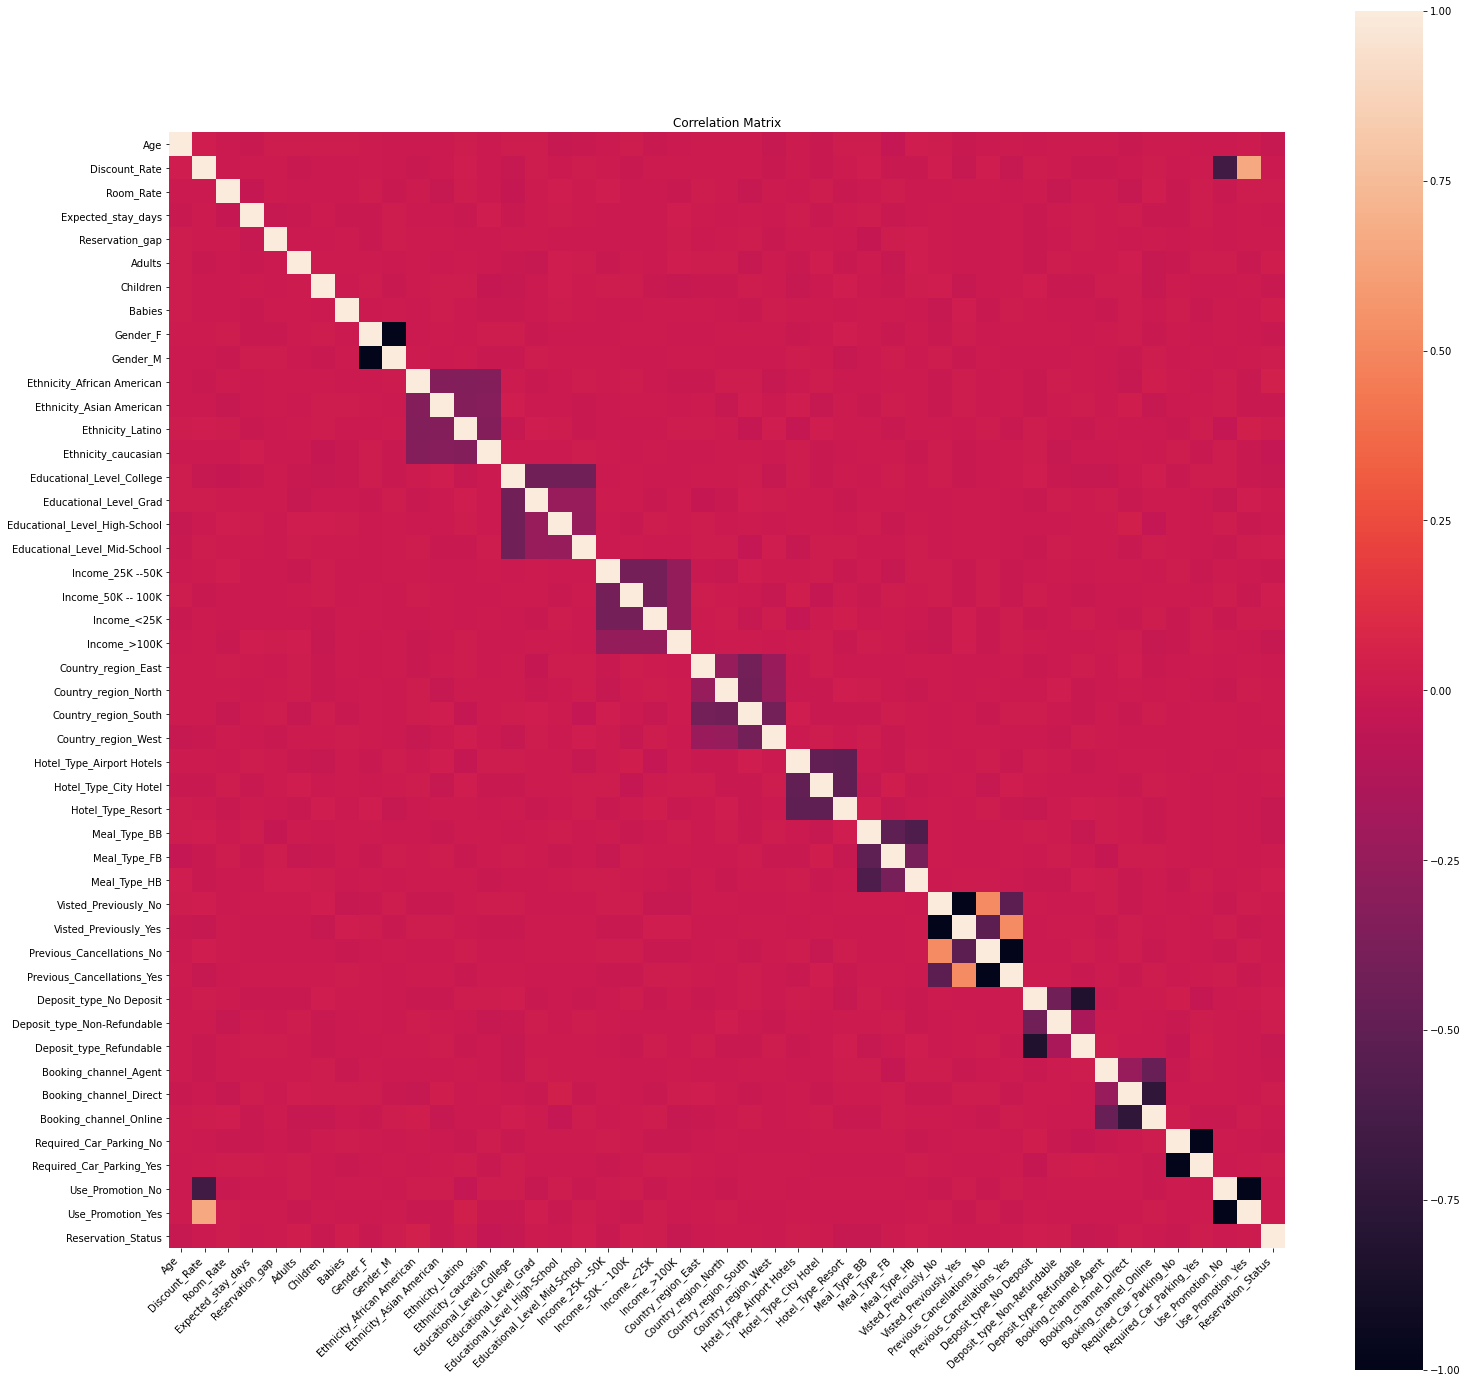

In [46]:
fig, ax0 = plt.subplots(figsize=(25,25))
ax = sns.heatmap(correlation_df.corr(), 
                #annot=True,
                #cmap=sns.diverging_palette(20, 220, n=200),
                square=True,
                 ax=ax0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set(title="Correlation Matrix")
plt.show()